In [164]:
import pandas as pd
pd.options.display.max_columns = 80
pd.options.display.max_rows = 80
import numpy as np

import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [165]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [166]:
df = pd.read_excel('oleo_termico_impreg.xlsx')

In [167]:
df.shape

(1009, 72)

In [168]:
alvo = ['Impregnadora Vent zona 3 Set Point Velocidade', 'Impregnadora Vent zona 3 Set Point Velocidade Real',
'Impregnadora Vent zona 3 Status', 'Impregnadora Aq Zona 3 Set Point Temperatura', 
'Impregnadora Aq Zona 3 Temperatura Real', 'Impregnadora Aq Zona 3 Posicao Valvula']

In [191]:
df.shape

(1009, 72)

In [169]:
df.head(3)

,Data,MDP Aq 01 Posi Val,MDP Aq 01 Temp Entrada,MDP Aq 01 Temp Retorno,MDP Aq 01 Temp Nominal,MDP Aq 01 Temp Prato,MDP Aq 02 Posi Val,MDP Aq 02 Temp Entrada,MDP Aq 02 Temp Retorno,MDP Aq 02 Temp Nominal,MDP Aq 02 Temp Prato,MDP Aq 03 Posi Val,MDP Aq 03 Temp Entrada,MDP Aq 03 Temp Retorno,MDP Aq 03 Temp Nominal,MDP Aq 03 Temp Prato,MDP Aq 04 Posi Val,MDP Aq 04 Temp Entrada,MDP Aq 04 Temp Retorno,MDP Aq 04 Temp Nominal,MDP Aq 04 Temp Prato,MDP Aq 05 Posi Val,MDP Aq 05 Temp Entrada,MDP Aq 05 Temp Retorno,MDP Aq 05 Temp Nominal,MDP Aq 05 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Rotacao,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 1 Velocidade,Planta Bomba Secudaria 2 Corrente,Planta Bomba Secudaria 2 Rotacao,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 2 Velocidade,Planta Bomba Secudaria 3 Corrente,Planta Bomba Secudaria 3 Rotacao,Planta Bomba Secudaria 3 Status,Planta Bomba Secudaria 3 Velocidade,Planta Vazao Oleo Revestido,Impregnadora Vazao Oleo Termico,Impregnadora Temperatura Entrada Oleo,Impregnadora Temperatura de Saida Oleo,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Set Point Velocidade Real,Impregnadora Vent zona 1 Status,Impregnadora Vent zona 2 Set Point Velocidade,Impregnadora Vent zona 2 Set Point Velocidade Real,Impregnadora Vent zona 2 Status,Impregnadora Vent zona 3 Set Point Velocidade,Impregnadora Vent zona 3 Set Point Velocidade Real,Impregnadora Vent zona 3 Status,Impregnadora Vent zona 4 Set Point Velocidade,Impregnadora Vent zona 4 Set Point Velocidade Real,Impregnadora Vent zona 4 Status,Impregnadora Vent zona 5 Set Point Velocidade,Impregnadora Vent zona 5 Set Point Velocidade Real,Impregnadora Vent zona 5 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Temperatura Real,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 2 Set Point Temperatura,Impregnadora Aq Zona 2 Temperatura Real,Impregnadora Aq Zona 2 Posicao Valvula,Impregnadora Aq Zona 3 Set Point Temperatura,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Set Point Temperatura,Impregnadora Aq Zona 4 Temperatura Real,Impregnadora Aq Zona 4 Posicao Valvula,Impregnadora Aq Zona 5 Set Point Temperatura,Impregnadora Aq Zona 5 Temperatura Real,Impregnadora Aq Zona 5 Posicao Valvula
0,2022-09-01 00:00:00,24.010864,247.517517,245.055817,245,4.612755,67.817307,254.783447,249.787796,238,236.867538,68.449203,243.924393,248.399994,238,238.068222,5.418137,200.300003,199.164856,195,195.130768,4.612755,190.699997,190.521912,185,188.5,60,1416.354004,Ligado,80,48.099998,1415.645996,Ligado,80,0,0,Desligado,0,No Data,55.052082,247.531143,251.470871,1696.800049,1688,1,1688,1688,1,1709.599976,1688,1,1709.599976,1700.700073,1,1705.599976,1696,1,110,113.27021,0,110,110.164993,0.073838,163,162.622452,34.117477,158,159.344452,0,153,153.116928,0
1,2022-09-01 00:30:00,23.995277,247.705795,245.186508,245,4.612755,70.932205,254.932648,249.903641,238,237.1604,70.053474,243.909653,248.399994,238,238.086853,5.354057,200.300003,199.126678,195,195.169861,4.612755,190.699997,190.50972,185,188.5,60,1416.044189,Ligado,80,47.900002,1416,Ligado,80,0,0,Desligado,0,No Data,55.606194,246.717041,242.422607,1696.800049,1688,1,1688,1688,1,1709.599976,1688,1,1709.599976,1700.700073,1,1705.599976,1696,1,110,115.220001,0,110,109.933327,0.382883,163,162.59729,47.028351,158,158.729263,6.292542,153,153.345459,0
2,2022-09-01 01:00:00,23.286049,247.555817,244.910095,245,4.612755,63.305084,254.90921,249.601791,238,236.574997,67.513367,243.791992,248.100006,238,237.317917,5.963676,200.33905,198.921326,195,194.699997,4.612755,190.931183,190.631958,185,188.600922,59.533333,1415.933594,Ligado,80,48.400002,1415.468994,Ligado,80,0,0,Desligado,0,No Data,46.527779,248.233627,262.659149,1696.800049,1688,1,1688,1688,1,1709.599976,1688,1,1709.599976,1700.700073,1,1705.599976,1696,1,110,111.564911,11.161899,110,110.066986,0.968784,163,163.961288,0,158

In [170]:
def limpa(x):
    if x == 'Intf Shut':
        return 0
    else:
        return x


In [171]:
# Função para tirar o que não é String
for i in df.columns:
    df[i] = df[i].apply(lambda x: limpa(x))

In [172]:
# variáveis que são String
excluir = ['Planta Bomba Secudaria 1 Status', 'Planta Bomba Secudaria 2 Status' , 'Planta Bomba Secudaria 3 Status',
'Planta Vazao Oleo Revestido', 'Data']

In [173]:
# Função para transformar as Features em numéricas
def transformaFloat(x):
    if x not in excluir:
        df[x] = df[x].astype('float')

In [174]:
# Verificando maiores Correlação es com o Alvo
cor  = df.corr()['Impregnadora Aq Zona 3 Temperatura Real'].drop(['Impregnadora Aq Zona 3 Temperatura Real'])
abs(cor).sort_values(ascending= False).head(30)

Impregnadora Temperatura Entrada Oleo                 0.442218
Impregnadora Aq Zona 5 Temperatura Real               0.372553
Impregnadora Vazao Oleo Termico                       0.353984
Impregnadora Aq Zona 1 Temperatura Real               0.349865
Impregnadora Aq Zona 2 Temperatura Real               0.343225
Impregnadora Aq Zona 4 Temperatura Real               0.334022
Impregnadora Vent zona 1 Set Point Velocidade Real    0.297503
Impregnadora Vent zona 3 Set Point Velocidade Real    0.297503
Impregnadora Vent zona 5 Set Point Velocidade Real    0.296658
Impregnadora Vent zona 4 Set Point Velocidade Real    0.296630
Impregnadora Vent zona 2 Set Point Velocidade Real    0.296601
Impregnadora Vent zona 2 Set Point Velocidade         0.296601
Impregnadora Temperatura de Saida Oleo                0.288739
Impregnadora Aq Zona 3 Posicao Valvula                0.114069
Impregnadora Aq Zona 1 Set Point Temperatura          0.083838
Impregnadora Aq Zona 2 Set Point Temperatura          0

In [175]:
# Pegando as variáveis mais correlacionadas com a Temperatura
cor_tot = df.corr().abs()
superior = cor_tot.where(np.triu(np.ones(cor_tot.shape), k = 1).astype(np.bool))
remover = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]
df2 = df.drop(df[remover], axis = 1)

C:\Users\evaldjun\AppData\Local\Temp/ipykernel_35676/839294123.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [176]:
# Conforme o Rafael, esta informação não é confiável
df2.drop(['Planta Vazao Oleo Revestido'], axis = 1, inplace = True)

In [177]:
# Não mexer nele
df2.head(2)

,Data,MDP Aq 01 Posi Val,MDP Aq 01 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 3 Status,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Posicao Valvula
0,2022-09-01 00:00:00,24.010864,4.612755,60.0,Ligado,Ligado,Desligado,1696.800049,1,110,0.0,162.622452,34.117477,0.000000
1,2022-09-01 00:30:00,23.995277,4.612755,60.0,Ligado,Ligado,Desligado,1696.800049,1,110,0.0,162.597290,47.028351,6.292542


In [178]:
#Trabalhando na base para o KNN
df3 = df2.copy()

In [194]:
df3.head(3)

,Data,MDP Aq 01 Posi Val,MDP Aq 01 Temp Prato,Planta Bomba Secudaria 1 Corrente,Planta Bomba Secudaria 1 Status,Planta Bomba Secudaria 2 Status,Planta Bomba Secudaria 3 Status,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Posicao Valvula
0,2022-09-01 00:00:00,24.010864,4.612755,60.000000,Ligado,Ligado,Desligado,1696.800049,1,110,0.000000,162.622452,34.117477,0.000000
1,2022-09-01 00:30:00,23.995277,4.612755,60.000000,Ligado,Ligado,Desligado,1696.800049,1,110,0.000000,162.597290,47.028351,6.292542
2,2022-09-01 01:00:00,23.286049,4.612755,59.533333,Ligado,Ligado,Desligado,1696.800049,1,110,11.161899,163.961288,0.000000,15.374695


In [180]:
#Criando DataFrame para Normalizar os dados
excluir2 = ['Planta Bomba Secudaria 1 Status', 'Planta Bomba Secudaria 2 Status' , 'Planta Bomba Secudaria 3 Status']
df4 = pd.concat([df3, pd.get_dummies(df3[excluir2])], axis = 1)
df4.drop(excluir2, axis = 1, inplace= True)

In [181]:
# Armazenando dados com One Hoting
df5 = df4.copy()

In [182]:
df5.head(1)

,Data,MDP Aq 01 Posi Val,MDP Aq 01 Temp Prato,Planta Bomba Secudaria 1 Corrente,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Posicao Valvula,Planta Bomba Secudaria 1 Status_0,Planta Bomba Secudaria 1 Status_Desligado,Planta Bomba Secudaria 1 Status_Ligado,Planta Bomba Secudaria 2 Status_0,Planta Bomba Secudaria 2 Status_Desligado,Planta Bomba Secudaria 2 Status_Ligado,Planta Bomba Secudaria 3 Status_0,Planta Bomba Secudaria 3 Status_Desligado,Planta Bomba Secudaria 3 Status_Ligado
0,2022-09-01,24.010864,4.612755,60.0,1696.800049,1,110,0.0,162.622452,34.117477,0.0,0,0,1,0,0,1,0,1,0


In [183]:
df6 = df5.drop(['Data'], axis = 1)

In [184]:
# Normalizando os Dados 
scala = StandardScaler()
df6 = scala.fit_transform(df6)

c:\Users\evaldjun\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\evaldjun\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



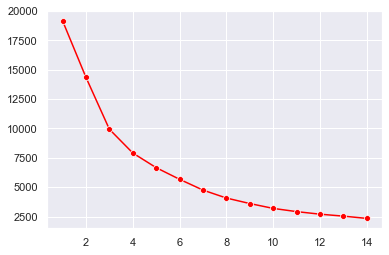

In [185]:
from sklearn.cluster import KMeans

resultado = []

for i in range(1,15):
    kkmeans = KMeans(n_clusters= i, init = 'k-means++', random_state=5, max_iter=300)
    kkmeans.fit(df6)
    resultado.append(kkmeans.inertia_)

sns.lineplot(range(1,15), resultado, marker = 'o', color = 'red');

In [186]:
agrupamento = KMeans(n_clusters=10, init='k-means++', max_iter=300 )
kmeans = agrupamento.fit(df6)

In [188]:
df_final = df5.copy()
df_final.drop(['Data'], axis = 1, inplace = True)
df_final['Grupo'] = kmeans.labels_

In [192]:
df_final['Grupo'].value_counts()

6    441
0    131
1    124
8    121
9    114
5     61
4      8
3      4
7      4
2      1
Name: Grupo, dtype: int64

In [190]:
df_final.head()

,MDP Aq 01 Posi Val,MDP Aq 01 Temp Prato,Planta Bomba Secudaria 1 Corrente,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Posicao Valvula,Planta Bomba Secudaria 1 Status_0,Planta Bomba Secudaria 1 Status_Desligado,Planta Bomba Secudaria 1 Status_Ligado,Planta Bomba Secudaria 2 Status_0,Planta Bomba Secudaria 2 Status_Desligado,Planta Bomba Secudaria 2 Status_Ligado,Planta Bomba Secudaria 3 Status_0,Planta Bomba Secudaria 3 Status_Desligado,Planta Bomba Secudaria 3 Status_Ligado,Grupo
0,24.010864,4.612755,60.000000,1696.800049,1,110,0.000000,162.622452,34.117477,0.000000,0,0,1,0,0,1,0,1,0,6
1,23.995277,4.612755,60.000000,1696.800049,1,110,0.000000,162.597290,47.028351,6.292542,0,0,1,0,0,1,0,1,0,6
2,23.286049,4.612755,59.533333,1696.800049,1,110,11.161899,163.961288,0.000000,15.374695,0,0,1,0,0,1,0,1,0,6
3,30.023643,4.612755,59.950001,1696.800049,1,110,0.000000,163.216141,2.579283,30.835135,0,0,1,0,0,1,0,1,0,6
4,30.378250,4.612755,59.400002,1696.800049,1,110,0.000000,162.799988,17.449348,0.000000,0,0,1,0,0,1,0,1,0,6


In [198]:
df_final.groupby(['Grupo']).mean()

,MDP Aq 01 Posi Val,MDP Aq 01 Temp Prato,Planta Bomba Secudaria 1 Corrente,Impregnadora Vent zona 1 Set Point Velocidade,Impregnadora Vent zona 1 Status,Impregnadora Aq Zona 1 Set Point Temperatura,Impregnadora Aq Zona 1 Posicao Valvula,Impregnadora Aq Zona 3 Temperatura Real,Impregnadora Aq Zona 3 Posicao Valvula,Impregnadora Aq Zona 4 Posicao Valvula,Planta Bomba Secudaria 1 Status_0,Planta Bomba Secudaria 1 Status_Desligado,Planta Bomba Secudaria 1 Status_Ligado,Planta Bomba Secudaria 2 Status_0,Planta Bomba Secudaria 2 Status_Desligado,Planta Bomba Secudaria 2 Status_Ligado,Planta Bomba Secudaria 3 Status_0,Planta Bomba Secudaria 3 Status_Desligado,Planta Bomba Secudaria 3 Status_Ligado
Grupo,,,,,,,,,,,,,,,,,,,
0,21.555341,5.167216,0.000000,1701.873284,0.954198,115.748092,13.074667,158.984670,57.478193,13.092094,0.0,1.00,0.00,0.0,0.0,1.0,0.0,0.00,1.00
1,28.547617,5.366599,58.640415,1702.954552,1.000000,129.774194,22.268206,159.598141,42.776149,13.892604,0.0,0.00,1.00,0.0,0.0,1.0,0.0,1.00,0.00
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.00,0.00,1.0,0.0,0.0,1.0,0.00,0.00
3,84.943853,11.032806,0.000000,1698.800049,0.250000,113.000000,100.000000,103.604551,100.000000,100.000000,0.0,1.00,0.00,0.0,1.0,0.0,0.0,1.00,0.00
4,69.233895,96.758038,27.205208,1699.800049,0.000000,114.500000,100.000000,40.012875,100.000000,100.000000,0.0,0.25,0.75,0.0,0.0,1.0,0.0,0.75,0.25
5,27.578322,5.265828,58.195863,1696.865623,1.901639,120.081967,22.913447,71.906195,8.501627,99.890332,0.0,0.00,1.00,0.0,0.0,1.0,0.0,1.00,0.00
6,15.154515,4.787018,56.819674,1700.058369,1.056689,113.977324,9.101562,156.495717,20.549772,8.870462,0.0,0.00,1.00,0.0,0.0,1.0,0.0,1.00,0.00
7,22.558118,5.242359,58.631249,1696.800049,1.000000,130.000000,0.000000,-3276.800049,100.000000,0.000000,0.0,0.00,1.00,0.0,0.0,1.0,0.0,1.00,0.00
8,8.091149,5.279328,80.230577,1699.600033,0.909091,116.504132,12.552337,138.965465,99.375418,10.396833,0.0,0.00,1.00,0.0,0.0,1.0,0.0,1.00,0.00
